##### Importación de librerías

In [6]:
import librosa
import librosa.display
import tqdm
import os
import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
urbansound8k_path = "../../data/raw/UrbanSound8K"

In [114]:
print("Visualización de los metadatos del dataset UrbanSound8K")

metadata_urbansound8k_df = pd.read_csv( urbansound8k_path + "/metadata/UrbanSound8K.csv", sep=",")
display(metadata_urbansound8k_df.head(5))

Visualización de los metadatos del dataset UrbanSound8K


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [115]:
print(f"Cantidad total de muestras = {metadata_urbansound8k_df.shape[0]}")

Cantidad total de muestras = 8732


In [116]:
print("Cantidad de muestras agrupadas por clase")

metadata_urbansound8k_count = metadata_urbansound8k_df.groupby('class').size()
print(metadata_urbansound8k_count)

Cantidad de muestras agrupadas por clase
class
air_conditioner     1000
car_horn             429
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
gun_shot             374
jackhammer          1000
siren                929
street_music        1000
dtype: int64


Verificacion de calidad

In [117]:
audio_path_list = []
muestras_encontradas_contador = 0
for index, row in metadata_urbansound8k_df.iterrows():
    path_total_file = f"{urbansound8k_path}/audio/fold{row['fold']}/{row['slice_file_name']}"
    audio_path_list.append(path_total_file)
    if os.path.isfile(path_total_file):
        muestras_encontradas_contador += 1

metadata_urbansound8k_df['path'] = audio_path_list

print("Validación de archivos existente")
print(f"Archivos encontrado : {muestras_encontradas_contador}")

Validación de archivos existente
Archivos encontrado : 8732


In [129]:
audio_duracion_list = []
audio_tasa_muestreo_list = []
audio_desplazamiento_dc_list = []
audio_cantidad_canales_list = []
audio_rango_dinamico_list = []
audio_energia_list = []
audio_tasa_cruce_cero_list = []
audio_entropia_espectograma_list = []
audio_centroide_espectral_list = []
audio_tonalidad_list = []

muestras_duracion_sumatoria = 0
for index, row in metadata_urbansound8k_df.iterrows():
    serie_tiempo, tasa_muestreo_hz = librosa.load(row['path'], sr=None, mono=False)
    duracion_segundos = librosa.get_duration(y=serie_tiempo, sr=tasa_muestreo_hz) # Calcular la duración (en segundos) de una serie temporal de audio
    desplazamiento_dc = np.abs(np.mean(serie_tiempo)) # Desplazamiento de corriente continua (DC offset)
    cantidad_canales = len(serie_tiempo.shape)
    rango_dinamico = np.max(serie_tiempo) - np.min(serie_tiempo)
    energia = np.sum(serie_tiempo**2)

    zero_crossings = librosa.zero_crossings(serie_tiempo, pad=False)
    tasa_cruce_cero = np.sum(zero_crossings)

    spec = np.abs(librosa.stft(serie_tiempo))**2
    entropia_espectograma = scipy.stats.entropy(spec.flatten())

    spectral_centroids = librosa.feature.spectral_centroid(y=serie_tiempo, sr=tasa_muestreo_hz)[0]
    avg_centroide_espectral = np.mean(spectral_centroids)   

    # Promedio del pitch
    avg_tonalidad = 0#np.mean(pitch_values)

    audio_duracion_list.append(duracion_segundos)
    audio_tasa_muestreo_list.append(tasa_muestreo_hz)
    audio_desplazamiento_dc_list.append(desplazamiento_dc)
    audio_cantidad_canales_list.append(cantidad_canales)
    audio_rango_dinamico_list.append(rango_dinamico)
    audio_energia_list.append(energia)
    audio_tasa_cruce_cero_list.append(tasa_cruce_cero)
    audio_entropia_espectograma_list.append(entropia_espectograma)
    audio_centroide_espectral_list.append(avg_centroide_espectral)   
    audio_tonalidad_list.append(avg_tonalidad)    
    
    #muestras_duracion_sumatoria += duracion_segundos

metadata_urbansound8k_df['duracion'] = audio_duracion_list
metadata_urbansound8k_df['tasa_muestreo'] = audio_tasa_muestreo_list
metadata_urbansound8k_df['desplazamiento_dc'] = audio_desplazamiento_dc_list
metadata_urbansound8k_df['cantidad_canales'] = audio_cantidad_canales_list
metadata_urbansound8k_df['rango_dinamico'] = audio_rango_dinamico_list
metadata_urbansound8k_df['energia'] = audio_energia_list
metadata_urbansound8k_df['tasa_cruce_cero'] = audio_tasa_cruce_cero_list
metadata_urbansound8k_df['entropia_espectograma'] = audio_entropia_espectograma_list
metadata_urbansound8k_df['avg_centroide_espectral'] = audio_centroide_espectral_list
metadata_urbansound8k_df['avg_tonalidad'] = audio_tonalidad_list

#print("Validacion sumatoria de duracion de audios ")
#print(f"Archivos encontrado : {muestras_duracion_sumatoria}")

Validacion sumatoria de duracion de audios 
Archivos encontrado : 31500.880612979


In [131]:
metadata_urbansound8k_df.to_csv("../../data/processed/metadata_urbansound8k_adic.csv", sep=';', index=False)

In [7]:
metadata_urbansound8k_df = pd.read_csv("../../data/processed/metadata_urbansound8k_adic.csv", sep=";")

In [15]:
display(metadata_urbansound8k_df.head(5))

,slice_file_name,fsID,start,end,salience,fold,classID,class,path,duracion,tasa_muestreo,desplazamiento_dc,cantidad_canales,rango_dinamico,energia,tasa_cruce_cero,entropia_espectograma,avg_centroide_espectral,avg_tonalidad
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,../../data/raw/UrbanSound8K/audio/fold5/100032...,0.317551,44100,0.000005,2,1.966949,757.039500,1947,6.716659,2503.702337,0
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,../../data/raw/UrbanSound8K/audio/fold5/100263...,4.000000,44100,0.000067,2,0.077789,9.032963,27607,9.991457,2339.221804,0
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,../../data/raw/UrbanSound8K/audio/fold5/100263...,4.000000,44100,0.000097,2,0.045868,4.803137,20971,9.728703,2070.826863,0
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,../../data/raw/UrbanSound8K/audio/fold5/100263...,4.000000,44100,0.000074,2,0.113770,18.263489,26200,9.046845,2879.638200,0
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,../../data/raw/UrbanSound8K/audio/fold5/100263...,4.000000,44100,0.000085,2,0.044830,5.621743,25189,10.048405,2197.598874,0


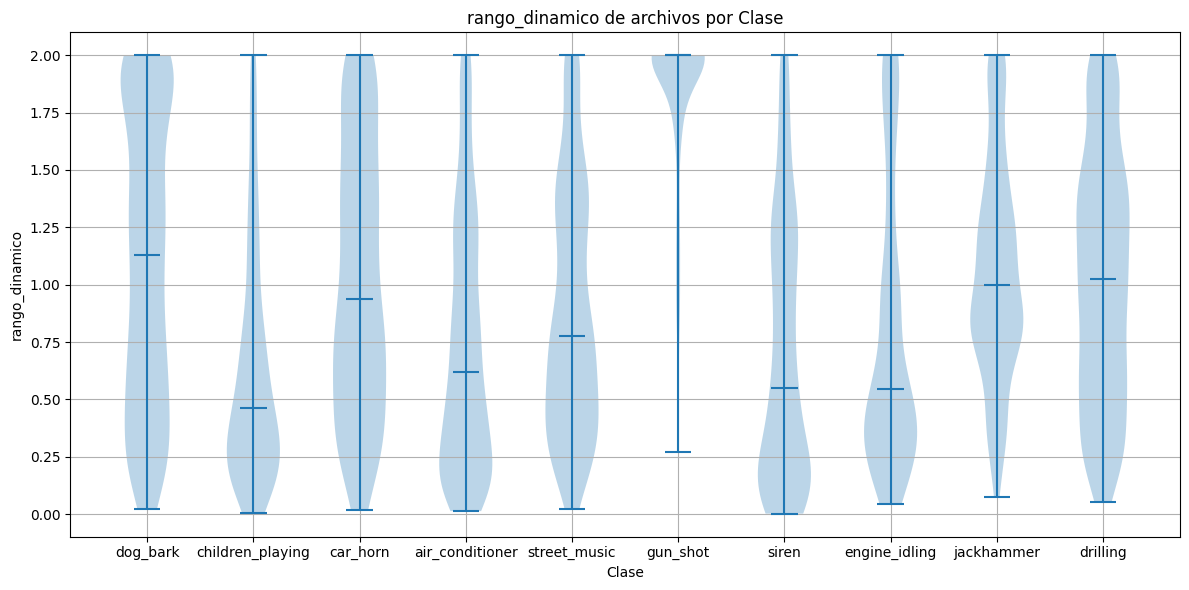

In [14]:
caracteristica_audio = 'rango_dinamico'
classes = metadata_urbansound8k_df['class'].unique()
duration_data = [metadata_urbansound8k_df[metadata_urbansound8k_df['class'] == cls][caracteristica_audio].values for cls in classes]

# Configurar el gráfico de velas
plt.figure(figsize=(12, 6))
plt.violinplot(duration_data, showmedians=True)

# Personalizar etiquetas y título
plt.xticks(np.arange(1, len(classes) + 1), classes)
plt.xlabel('Clase')
plt.ylabel(caracteristica_audio)
plt.title(f'{caracteristica_audio} de archivos por Clase')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
signal, sr = librosa.load("../../data/raw/UrbanSound8K/audio/fold4/23161-6-0-0.wav", sr=None)
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
print(mfccs)

[[-4.11635529e+02 -3.81790436e+02 -3.54078369e+02 -2.87987274e+02
  -2.76885345e+02 -2.95865875e+02 -3.09267487e+02 -3.15386841e+02
  -3.16557007e+02 -3.26685822e+02 -3.33907562e+02 -3.36723755e+02
  -3.45338135e+02 -3.47654938e+02 -3.44338135e+02 -3.28370087e+02
  -3.13281586e+02 -3.26442200e+02 -3.43213562e+02 -3.48359741e+02
  -3.49368713e+02 -3.54127441e+02 -3.62418274e+02 -3.91734589e+02]
 [ 1.04846069e+02  1.04289497e+02  1.24142593e+02  1.63734192e+02
   1.61309265e+02  1.44421432e+02  1.35568848e+02  1.27982872e+02
   1.27516716e+02  1.20319649e+02  1.18282257e+02  1.17472763e+02
   1.12566063e+02  1.12419189e+02  1.17301270e+02  1.31678558e+02
   1.50394531e+02  1.38594269e+02  1.17707550e+02  1.12098045e+02
   1.11816895e+02  1.09340607e+02  1.05210457e+02  1.03632919e+02]
 [ 2.71075363e+01  2.64362717e+01  1.31554785e+01 -7.43603516e+00
  -2.14967422e+01 -2.35638905e+01 -2.10360565e+01 -1.70103607e+01
  -1.58148918e+01 -1.86484756e+01 -1.43132277e+01 -1.09561615e+01
  -6.831

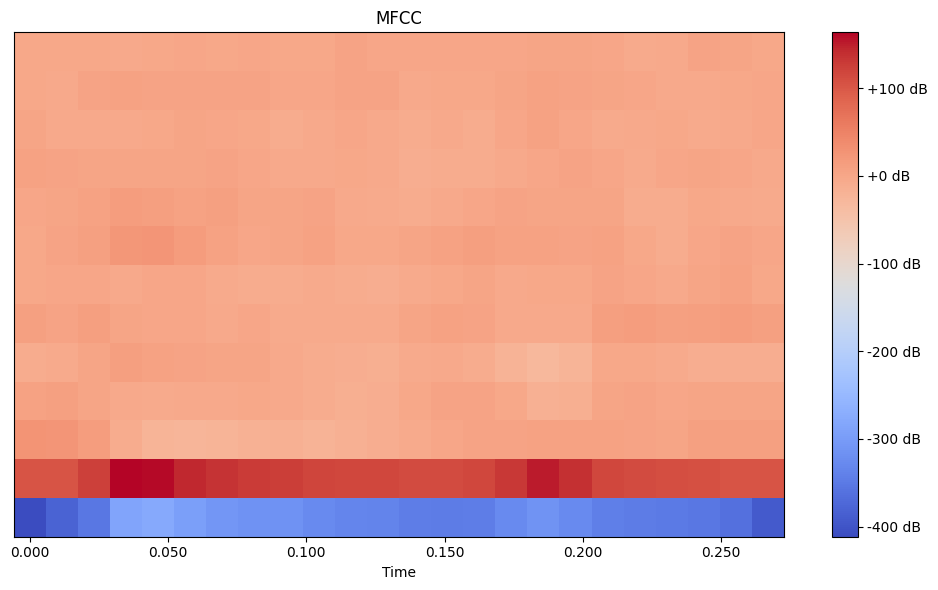

In [23]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

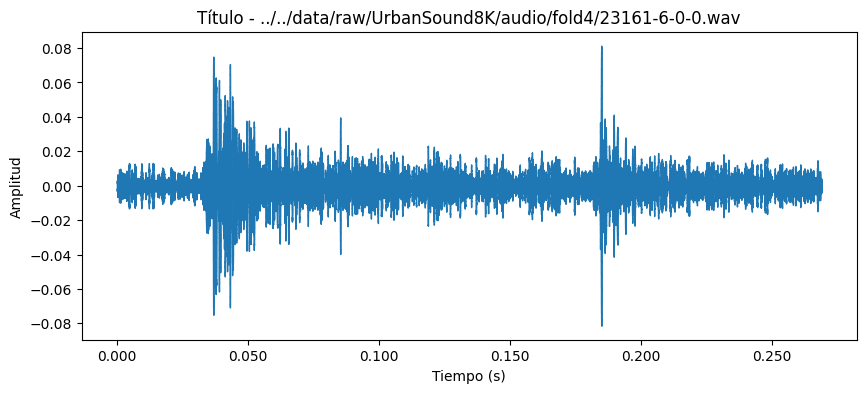

In [24]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Cargar el archivo de audio
audio_file = '../../data/raw/UrbanSound8K/audio/fold4/23161-6-0-0.wav'
signal, sr = librosa.load(audio_file, sr=None)  # sr=None para mantener la tasa de muestreo original

# Crear el gráfico de la forma de onda
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title(f'Título - {audio_file}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()